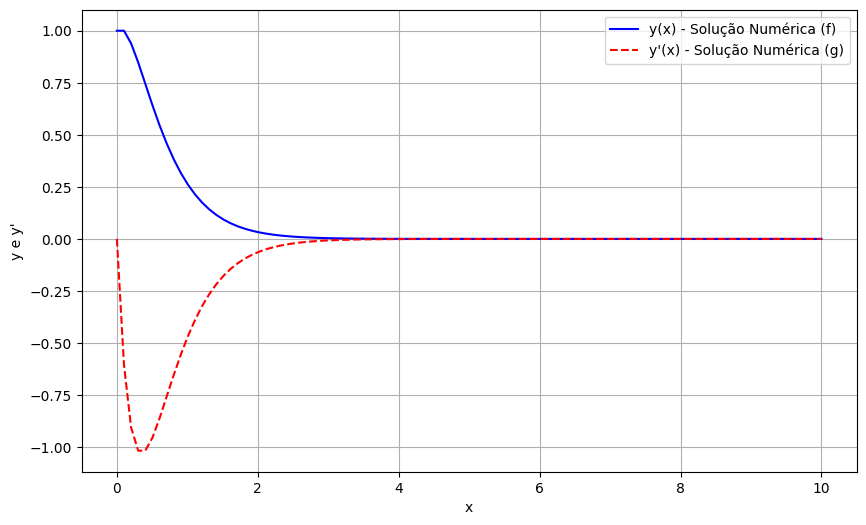

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def solucao_edo_MDF(y0, g0, x_i, x_f, N_points):

    M = N_points

    Delta_x = (x_f - x_i) / (M - 1)

    x = np.linspace(x_i, x_f, M)

    # O sistema reduzido tem 2 * (M - 1) incógnitas:
    num_unknowns = 2 * (M - 1)

    A = np.zeros((num_unknowns, num_unknowns))
    b = np.zeros(num_unknowns)

    # 1. f_{i+1} - f_i - Delta_x * g_i = 0
    # 2. g_{i+1} - (1 + Delta_x) * g_i + Delta_x * f_i = 0

    for i in range(M - 1):
        k1 = 2 * i
        k2 = 2 * i + 1

        col_fi = 2 * (i - 1)
        col_gi = 2 * (i - 1) + 1
        col_fip1 = 2 * i
        col_gip1 = 2 * i + 1


        if i == 0:
            A[0, col_fip1] = 1
            b[0] = y0 + Delta_x * g0

            A[1, col_gip1] = 1
            #b[1] = (1 + Delta_x) * g0 - Delta_x * y0
            b[1] = -6 * Delta_x * y0 - (5 * Delta_x - 1) * g0

        else:
            A[k1, col_fi] = -1
            A[k1, col_gi] = -Delta_x
            A[k1, col_fip1] = 1

            #A[k2, col_fi] = Delta_x
            A[k2, col_fi] = 6 * Delta_x
            #A[k2, col_gi] = -(1 + Delta_x)
            A[k2, col_gi] = 5 * Delta_x - 1
            A[k2, col_gip1] = 1



    u_solution = np.linalg.solve(A, b)


    f_num = np.zeros(M)
    g_num = np.zeros(M)

    f_num[0] = y0
    g_num[0] = g0

    for i in range(1, M):
        f_num[i] = u_solution[2 * (i - 1)]
        g_num[i] = u_solution[2 * (i - 1) + 1]

    return x, f_num, g_num


y_ini = 1.0
g_ini = 0.0
x_ini = 0.0
x_fim = 10.0
N_points = 100

x_sol, y_num, g_num = solucao_edo_MDF(y_ini, g_ini, x_ini, x_fim, N_points)

plt.figure(figsize=(10, 6))
plt.plot(x_sol, y_num, label='y(x) - Solução Numérica (f)', color='blue')
plt.plot(x_sol, g_num, label="y'(x) - Solução Numérica (g)", linestyle='--', color='red')
plt.xlabel('x')
plt.ylabel('y e y\'')
plt.grid(True)
plt.legend()
plt.show()